In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import AFAI_library as afai
import AFAI_library_torch as afai_cuda
import AFAI_parallelGPU as afai_parallel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
%autoreload 2

In [4]:
period = 2
hopping = - 3 * np.pi/(2* period)
model = afai_cuda.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)
model_gpu = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)

In [37]:
tx = torch.tensor([1,2,3], device='cuda:0')
ty = torch.tensor([1,2,3], device='cuda:0')
vd1 = 2
vd2 = torch.tensor([1,2,3], device='cuda:0')

In [27]:
H1 = model_gpu.Hamiltonian_tbc1(ty, tbc='y')
print(H1)

tensor([[[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           1.2731-1.9827j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  2.3562-0.0000j],
         [ 2.3562+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  1.2731+1.9827j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  2.3562+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j]],

        [[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
          -0.9805-2.1425j,  0.0000+0.0000j],
         [ 0.0

In [28]:
H2 = model_gpu.Hamiltonian_tbc2(tx, tbc='xy')
print(H2)

tensor([[[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],

        [[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],



In [29]:
H3 = model_gpu.Hamiltonian_tbc3(1, tbc='y')
print(H3)

tensor([[[0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 1.2731-1.9827j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          2.3562-0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 1.2731-1.9827j],
         [1.2731+1.9827j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 2.3562+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 1.2731+1.9827j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j]]], device='cuda:0',
       dtype=torch.complex128)


In [59]:
H4 = model_gpu.Hamiltonian_tbc4(1, tbc='xy')
print(H4.shape)

torch.Size([9, 9])


-1.0 0.26625505089759827


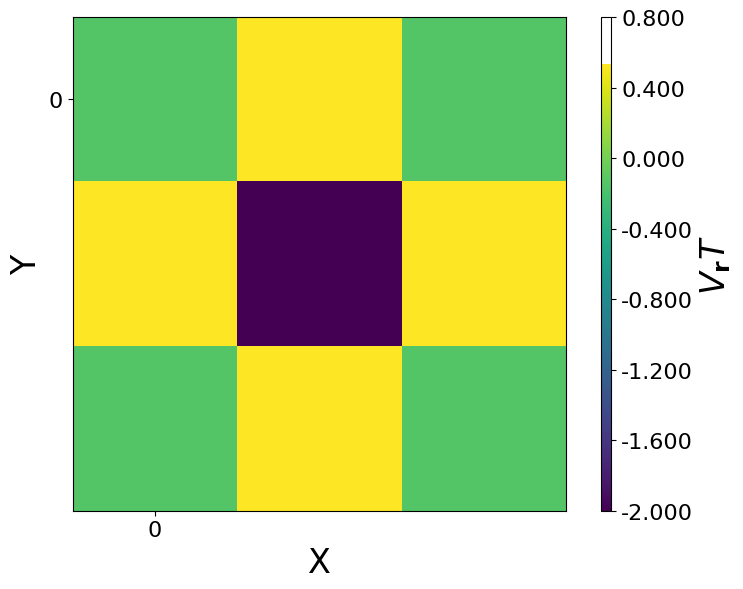

In [45]:
H_ap = model_gpu.aperiodic_Honsite(vd2, contourplot=True)
# print(H_ap)

In [54]:
H_dis = model_gpu.Hamiltonian_disorder(vd1, contourplot=False)
print(H_dis.shape)

torch.Size([1, 9, 9])


In [58]:
H_dis = model_gpu.Hamiltonian_onsite(vd2, fully_disorder=False)
print(H_dis.shape)
print(H_dis)

torch.Size([3, 9, 9])
tensor([[[ 0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.5191+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -1.7854+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.7145+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1640: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


In [9]:
theta_x = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
theta_y = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
vd = np.array([1, 2], dtype=np.float64)
vd1 = 2
theta_y1 = np.array([1])
t = np.array([1, 1.5, 2, 2.5, 3])
t1 = np.array([1])
# aa= model_gpu.Hamiltonian_tbc(1, 'xy', vd, np.pi/4, theta_x, theta_y)
# print(aa.shape)

In [10]:
bb = model_gpu.time_evolution_operator1(t1, 100, 'xy', vd, np.pi/4, theta_x, theta_y1)
print(bb.shape)

torch.Size([2, 4, 9, 9])


In [17]:
period1 = 1
period2 = 100
hopping3 = - 5 * np.pi/(2 * period)
model_afai2 = afai_parallel.tb_floquet_tbc_cuda(period1, 1, hopping3, ny = 20, nx = 20, device='cuda:0')
model_afai3 = afai_parallel.tb_floquet_tbc_cuda(period2, 1, hopping3, ny = 20, nx = 20, device='cuda:0')

In [18]:
vd = torch.linspace(0.5, 4, 11)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1635: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


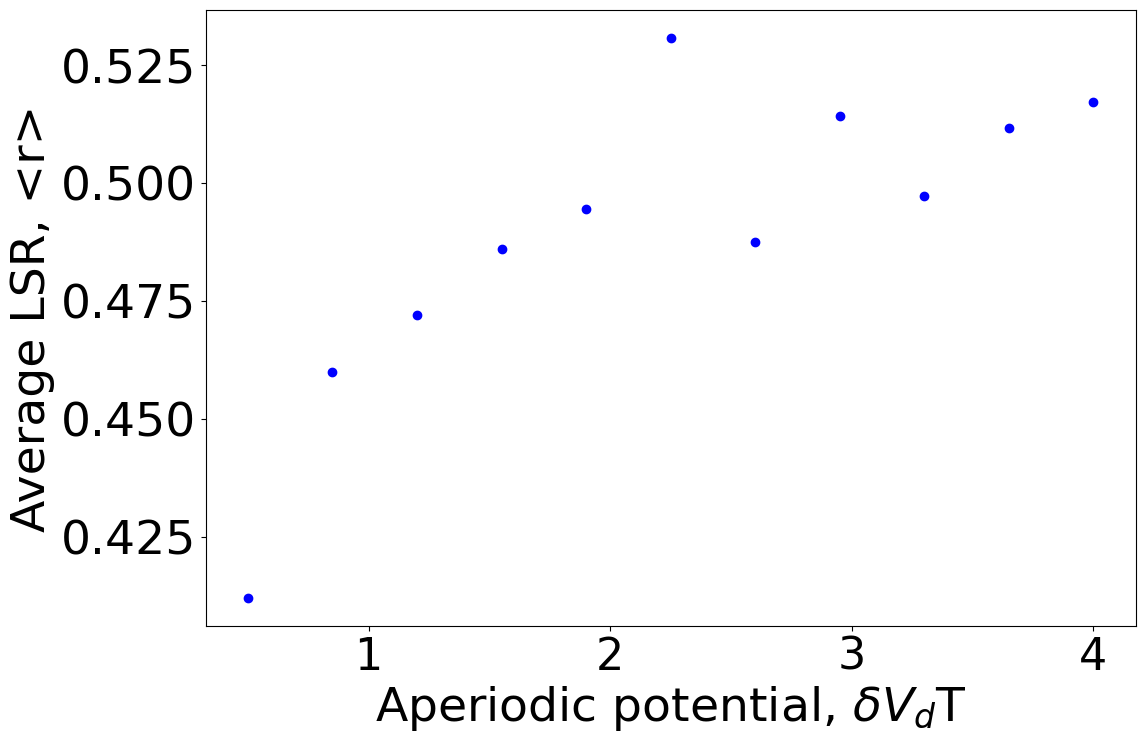

In [20]:
avg_LSR1 = model_afai2.avg_level_spacing_bulk(100, vd, fully_disorder= False ,plot=True)